In [1]:
# project: p12
# submitter: dargall
# partner: cjwacker
# hours: 0

In [28]:
import time
import pandas as pd
from pandas import DataFrame, Series
import os
import requests
import math 
import sqlite3
from bs4 import BeautifulSoup
import json 
import matplotlib
from matplotlib import pyplot as plt 
import numpy as np

In [29]:
def download(filename, url):
    if os.path.exists(filename):
        text = (str(filename) + " already exists!")
    else:
        r = requests.get(url)
        r.raise_for_status()
        data = r.text
        f = open(filename, "w", encoding="utf-8")
        f.write(data)
        f.close()
        text = (str(filename) + " created!")
    return text

In [30]:
download("QSranking.json", "https://raw.githubusercontent.com/msyamkumar/cs220-f21-projects/main/p13/QSranking.json")

'QSranking.json already exists!'

In [31]:
# ensures that font.size setting remains permanent
%matplotlib inline 
pd.set_option('display.max_colwidth', None)
matplotlib.rcParams["font.size"] = 13 # don't use value > 13! Otherwise your y-axis tick labels will be different. 

In [32]:
rankings = pd.read_json('QSranking.json')
conn = sqlite3.connect('QSrankings.db')
rankings.to_sql("rankings", conn, if_exists = "replace", index = False)

# remember to do conn.close() at the end of your notebook or your code may crash when we run test.py.

In [33]:
pd.read_sql("SELECT * FROM sqlite_master", conn)

,type,name,tbl_name,rootpage,sql
0,table,rankings,rankings,2,"CREATE TABLE ""rankings"" (\n""rank"" INTEGER,\n ""year"" INTEGER,\n ""institution_name"" TEXT,\n ""country"" TEXT,\n ""academic_reputation"" REAL,\n ""employer_reputation"" REAL,\n ""faculty_student_score"" REAL,\n ""citations_per_faculty"" REAL,\n ""international_faculty"" REAL,\n ""international_students"" REAL,\n ""overall_score"" REAL\n)"


In [34]:
pd.read_sql(
"""
SELECT *
FROM rankings
LIMIT 7
""", conn) 
#qry("""
#SELECT 
#FROM rankings
#WHERE 
#GROUP BY 
#ORDER BY 
#HAVING 
#LIMIT
#""")

,rank,year,institution_name,country,academic_reputation,employer_reputation,faculty_student_score,citations_per_faculty,international_faculty,international_students,overall_score
0,1,2018,Massachusetts Institute Of Technology,United States,100.0,100.0,100.0,99.9,100.0,96.1,100.0
1,2,2018,Stanford University,United States,100.0,100.0,100.0,99.4,99.6,72.7,98.7
2,3,2018,Harvard University,United States,100.0,100.0,98.3,99.9,96.5,75.2,98.4
3,4,2018,California Institute Of Technology,United States,99.5,85.4,100.0,100.0,93.4,89.2,97.7
4,5,2018,University Of Cambridge,United Kingdom,100.0,100.0,100.0,78.3,97.4,97.7,95.6
5,6,2018,University Of Oxford,United Kingdom,100.0,100.0,100.0,76.3,98.6,98.5,95.3
6,7,2018,Ucl,United Kingdom,99.7,99.5,99.1,74.7,96.6,100.0,94.6


In [35]:
def qry(sql, c = conn):
    return pd.read_sql(sql, conn) 


In [36]:
#Q1: In the year 2020, list the top 10 institutions in Canada which have the highest value in the column international_students.
qry("""
SELECT institution_name, international_students
FROM rankings   
WHERE year == 2020 AND country == "Canada"  
ORDER BY international_students DESC
LIMIT 10
""")

,institution_name,international_students
0,Mcgill University,96.2
1,University Of Toronto,93.0
2,Simon Fraser University,91.5
3,University Of Waterloo,84.1
4,University Of Alberta,80.8
5,University Of British Columbia,79.3
6,Dalhousie University,73.4
7,Université De Montréal,61.8
8,University Of Calgary,61.2
9,University Of Ottawa,56.7


In [37]:
#Q2: In the year 2019, list the top 10 institutions in the United States which have the highest score of (academic_reputation + employer_reputation). 
qry("""
SELECT institution_name, (academic_reputation + employer_reputation)  AS reputation 
FROM rankings
WHERE year == 2019 AND country == "United States" 
ORDER BY reputation DESC, institution_name
LIMIT 10
""")

,institution_name,reputation
0,Harvard University,200.0
1,Massachusetts Institute Of Technology,200.0
2,Stanford University,200.0
3,"University Of California, Berkeley",199.8
4,Yale University,199.6
5,"University Of California, Los Angeles",199.1
6,Columbia University,197.1
7,Princeton University,196.6
8,University Of Chicago,190.3
9,Cornell University,189.2


In [38]:
#Q3: In the year 2020, list the top 10 countries which have the most institutions.
qry("""
SELECT country, COUNT(*) as num_of_institutions
FROM rankings
WHERE year == 2020
GROUP BY country 
ORDER BY num_of_institutions DESC, country
LIMIT 10
""")

,country,num_of_institutions
0,United States,74
1,United Kingdom,45
2,Germany,23
3,Australia,21
4,Canada,14
5,China,14
6,France,14
7,Japan,14
8,Netherlands,13
9,Russia,13


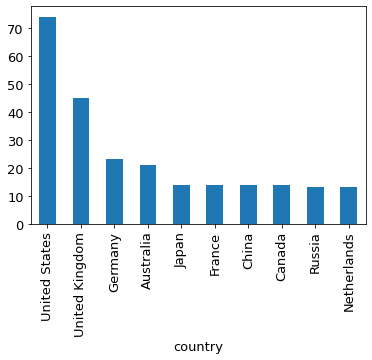

In [39]:
#Q4: In the year 2020, list the top 10 countries which have the most institutions. (answer with a plot) 
top_10 = qry("""
SELECT country, COUNT(*) as num_of_institutions
FROM rankings
WHERE year == 2020
GROUP BY country 
ORDER BY num_of_institutions DESC
LIMIT 10
""") 
ax = top_10.plot.bar(x = "country", y = "num_of_institutions") 
ax.get_legend().remove()

In [40]:
#Q5: In the year 2019, list the top 10 countries which have the highest total overall_score
qry("""
SELECT country, SUM(overall_score) as total_score 
FROM rankings
WHERE year == 2019 
GROUP BY country 
ORDER BY total_score DESC, institution_name 
LIMIT 10
""")

,country,total_score
0,United States,4298.4
1,United Kingdom,2539.2
2,Germany,1098.2
3,Australia,1093.8
4,Japan,752.9
5,China,743.4
6,Canada,705.3
7,Netherlands,674.9
8,South Korea,612.8
9,France,595.2


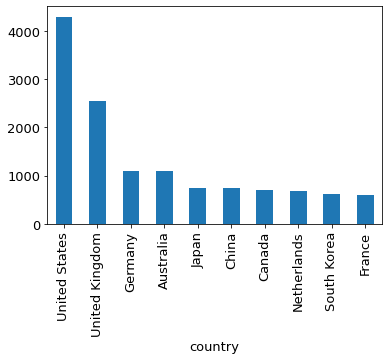

In [41]:
#Q6: In the year 2019, list the top 10 countries which have the highest total overall_score. (answer with a plot) 
top_scores = qry("""
SELECT country, SUM(overall_score) as total_score 
FROM rankings
WHERE year == 2019 
GROUP BY country 
ORDER BY total_score DESC, institution_name 
LIMIT 10
""") 
ax = top_scores.plot.bar(x = "country", y = "total_score") 
ax.get_legend().remove()

In [42]:
#Q7: In the year 2020, list the top 10 institutions in the United States which have the highest score of (international_faculty + international_students). 
qry("""
SELECT institution_name, international_faculty + international_students as international_score 
FROM rankings
WHERE year == 2020 AND country == "United States"
ORDER BY international_score DESC, institution_name
LIMIT 10
""")


,institution_name,international_score
0,Massachusetts Institute Of Technology,194.1
1,California Institute Of Technology,186.7
2,Carnegie Mellon University,183.5
3,Rice University,180.4
4,Northeastern University,179.1
5,Stanford University,167.5
6,Cornell University,166.1
7,Purdue University,158.2
8,University Of Rochester,157.9
9,University Of Chicago,151.2


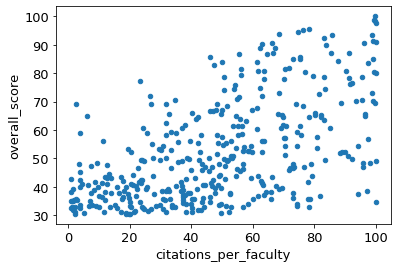

In [43]:
#Q8: In the year 2018, what is the relationship between citations_per_faculty and overall_score? 
relationship_df = qry("""
SELECT citations_per_faculty, overall_score
FROM rankings
WHERE year == 2018
""")
ax = relationship_df.plot.scatter(x = "citations_per_faculty", y = "overall_score")

In [44]:
#Q9: In the year 2019, what is the correlation between (citations_per_faculty * international_faculty) / 100 and overall_score? 
correlation_df = qry("""
SELECT (citations_per_faculty * international_faculty) / 100 as faculty, overall_score
FROM rankings
WHERE year == 2019 
""")  
corr_df = correlation_df.corr() 
corr_df["faculty"]["overall_score"]

0.557397228343763

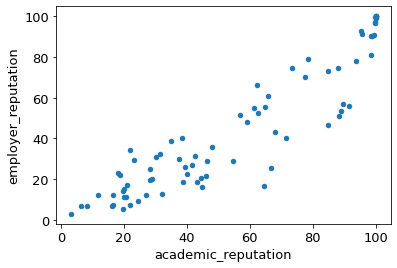

In [45]:
#Q10: In the year 2019, what is the relationship between academic_reputation and employer_reputation for institutions in United States?
relationship_ae = qry("""
SELECT academic_reputation, employer_reputation
FROM rankings
WHERE year == 2019 AND country == "United States"
""")
ax = relationship_ae.plot.scatter(x = "academic_reputation", y = "employer_reputation")

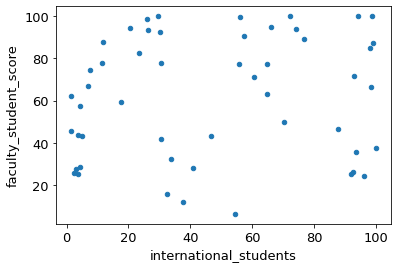

In [46]:
#Q11: In the year 2020, what is the relationship between international_students and faculty_student_score for the top institution in each country?
relationship_if = qry("""
SELECT rank, international_students, faculty_student_score
FROM rankings
WHERE year == 2020
GROUP BY country 
ORDER BY MIN(rank)
""")
ax = relationship_if.plot.scatter(x = "international_students", y = "faculty_student_score")

In [47]:
#Q12: Find the difference in correlation between international_students and overall_score in United States and United Kingdom for institutions ranked within the top 100 in the year 2020.

correlation_io_us = qry("""
SELECT international_students, overall_score
FROM rankings
WHERE year == 2020 AND country == "United States" AND rank <= 100
""")  

correlation_io_uk = qry("""
SELECT international_students, overall_score
FROM rankings
WHERE year == 2020 AND country == "United Kingdom" AND rank <= 100
""")  

corr_us = correlation_io_us.corr()["international_students"]["overall_score"]
corr_uk = correlation_io_uk.corr()["international_students"]["overall_score"]

corr_us-corr_uk

-0.18978846844574526

In [48]:
#Q13: In the year 2019, find the top 15 countries which have the highest sum of (citations_per_faculty * international_faculty) / 100.
top_15 = qry("""
SELECT country, SUM(citations_per_faculty * international_faculty/ 100) AS sum_citations
FROM rankings
WHERE year == 2019
GROUP BY country
ORDER BY SUM(citations_per_faculty * international_faculty/ 100) DESC
""")
top_15[:15]

,country,sum_citations
0,United States,2623.8207
1,United Kingdom,2347.1602
2,Australia,1255.5530
3,Netherlands,748.4268
4,Canada,724.5029
5,Switzerland,561.8790
6,China,482.2577
7,Germany,455.5466
8,Hong Kong,375.3032
9,New Zealand,327.3357


In [49]:
#Q14: In the year 2019, among the institutions ranked within the top 300, find the average of (citations_per_faculty * international_faculty) / 100 for each country.
top_within_300 = qry("""
SELECT country, AVG(citations_per_faculty * international_faculty/ 100) AS avg_citations
FROM rankings
WHERE year == 2019 AND rank <= 300
GROUP BY country
ORDER BY AVG(citations_per_faculty * international_faculty/ 100) DESC
""")

top_within_300

,country,avg_citations
0,Singapore,80.150000
1,Switzerland,75.497000
2,Hong Kong,62.550533
3,Australia,61.362388
4,Netherlands,56.166733
5,New Zealand,53.226220
6,United Kingdom,52.889084
7,Canada,50.779723
8,Denmark,46.196200
9,Norway,46.083300


In [50]:
#Q15: In the year 2020, for each country, find the institution with the highest value for (citations_per_faculty * international_faculty) / 100.

highest_value = qry("""
SELECT country, institution_name,  MAX(citations_per_faculty * international_faculty/ 100) AS max_int_citations
FROM rankings
WHERE year == 2020 AND citations_per_faculty IS NOT NULL AND international_faculty IS NOT NULL
GROUP BY country
ORDER BY MAX(citations_per_faculty * international_faculty/ 100) DESC
""")
highest_value

,country,institution_name,max_int_citations
0,United States,Massachusetts Institute Of Technology,99.8000
1,Switzerland,Ecole Polytechnique Fédérale De Lausanne,98.9000
2,Netherlands,Eindhoven University Of Technology,95.4493
3,United Kingdom,London School Of Economics And Political Science,91.1000
4,Hong Kong,The Hong Kong University Of Science And Technology,89.5000
5,Singapore,Nanyang Technological University,88.8000
6,Australia,The University Of Western Australia,88.3000
7,Belgium,Katholieke Universiteit Leuven,76.7700
8,New Zealand,University Of Waikato,73.6434
9,Canada,Western University,72.3240


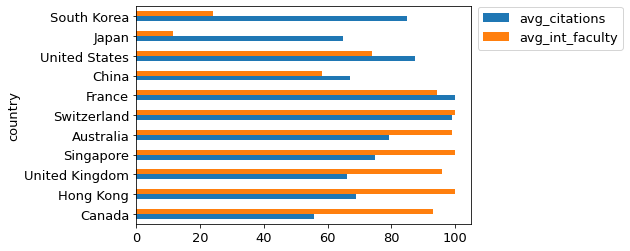

In [51]:
#Q16: In the year 2018, among the institutions ranked within the top 50, generate a barplot visualizing the average of citations_per_faculty and international_faculty for each country. (answer with a plot)

average_cit_int = qry("""
SELECT country, AVG(citations_per_faculty) as avg_citations, AVG(international_faculty) as avg_int_faculty
FROM rankings
WHERE year == 2018 AND rank <= 50
GROUP BY country
ORDER BY (AVG(citations_per_faculty)-AVG(international_faculty))
""")
ax = average_cit_int.plot.barh(x = "country")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.9))

<AxesSubplot:xlabel='x', ylabel='y'>

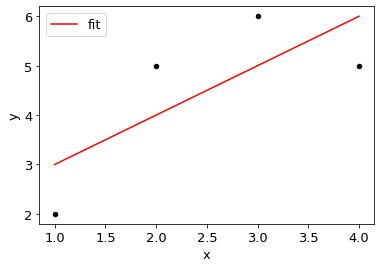

In [52]:
df = pd.DataFrame({
    "x": [1,2,3,4],
    "y": [2,5,6,5]
})
df["1"] = 1

res = np.linalg.lstsq(df[["x", "1"]], df["y"], rcond=None)

# res is a tuple: (COEFFICIENTS, VALUE, VALUE, VALUE)
coefficients = res[0] # coefficients is (m,n)
m = coefficients[0] # slope
n = coefficients[1] # intercept
ax = df.plot.scatter(x='x', y='y', color='black')

df["fit"] = df["x"] * m + n
df.plot.line(x='x', y='fit', c='red', ax=ax)

<AxesSubplot:xlabel='overall_score', ylabel='rank'>

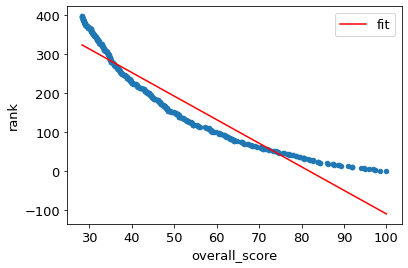

In [53]:
#Q17: For all the institutions in the year 2020, what is the relationship between overall_score and rank? (answer with a plot)
over_all_rank = qry("""
SELECT overall_score, rank
FROM rankings
WHERE year == 2020
""")

over_all_rank["1"] = 1

res = np.linalg.lstsq(over_all_rank[["overall_score", "1"]], over_all_rank["rank"], rcond=None)

# res is a tuple: (COEFFICIENTS, VALUE, VALUE, VALUE)
coefficients = res[0] # coefficients is (m,n)
m = coefficients[0] # slope
n = coefficients[1] # intercept
ax = over_all_rank.plot.scatter(x = "overall_score", y = "rank")
over_all_rank["fit"] = over_all_rank["overall_score"] * m + n
over_all_rank.plot.line(x='overall_score', y='fit', c='red', ax=ax)



<AxesSubplot:xlabel='inverse_overall_score', ylabel='rank'>

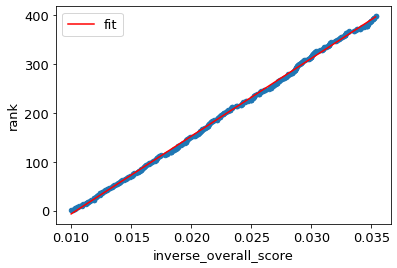

In [54]:
#Q18: For all the institutions in the year 2020, what is the relationship between 1 / overall_score and rank? (answer with a plot)
inverse_rank = qry("""
SELECT (1 / overall_score) as inverse_overall_score, rank
FROM rankings
WHERE year == 2020
""")

inverse_rank["1"] = 1

res = np.linalg.lstsq(inverse_rank[["inverse_overall_score", "1"]], inverse_rank["rank"], rcond=None)

# res is a tuple: (COEFFICIENTS, VALUE, VALUE, VALUE)
coefficients = res[0] # coefficients is (m,n)
m = coefficients[0] # slope
n = coefficients[1] # intercept
ax = inverse_rank.plot.scatter(x = "inverse_overall_score", y = "rank")
inverse_rank["fit"] = inverse_rank["inverse_overall_score"] * m + n
inverse_rank.plot.line(x='inverse_overall_score', y='fit', c='red', ax=ax)

In [55]:
#Q19: Use the regression line to estimate the rank of an institution with overall_score of 72.
math.ceil(m * 1/72 + n)

56

Text(0, 0.5, ' ')

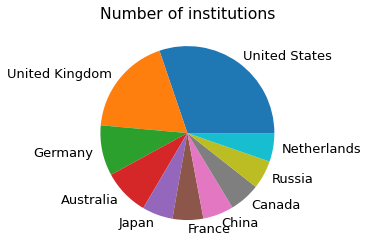

In [56]:
#Q20: What are the top 10 countries that have the most institutions in 2020? (answer with a plot)
top_10 = qry("""
SELECT country, COUNT(institution_name) as number_of_institutions
FROM rankings
WHERE year == 2020
GROUP BY country
ORDER BY COUNT(institution_name) DESC
""")[:10].set_index("country")
ax = top_10.plot.pie(y ="number_of_institutions")
ax.set_title("Number of institutions")
ax.get_legend().remove()
ax.set_ylabel(" ")